In [1]:
!pip install -q ultralytics
!pip install -q roboflow

Reason for being yanked: deprecated, use 4.8.0.76
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
jupyterlab 4.2.1 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
jupyterlab-lsp 5.1.0 requires jupyter-lsp>=2.0.0, but you have jupyter-lsp 1.5.1 which is incompatible.
libpysal 4.9.2 requires packaging>=22, but you have packaging 21.3 which is incompatible.
libpysal 4.9.2 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
momepy 0.7.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
osmnx 1.9.3 requires shapely>=2.0, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
tensorflow 2.15.0 requires keras<

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
from IPython import display
from ultralytics import YOLO
from IPython.display import display, Image
import torch
from PIL import Image
import torchvision.transforms as transforms
import ultralytics
from roboflow import Roboflow

# display.clear_output()
ultralytics.checks()

Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5689.5/8062.4 GB disk)


In [4]:
os.makedirs("datasets", exist_ok=True)
!mkdir {HOME}/datasets
%cd {HOME}/datasets
!pwd

mkdir: cannot create directory '/kaggle/working/datasets': File exists
/kaggle/working/datasets
/kaggle/working/datasets


## Importing Dataset

In [5]:
rf = Roboflow(api_key="4aNUsF0lOJiYU0hRdSR8")
project = rf.workspace("mohamed-mafaz-huxua").project("whatsappwindow")
version = project.version(2)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to WhatsappWindow-2 in yolov9:: 100%|██████████| 426/426 [00:00<00:00, 3593.25it/s]


## Training

In [6]:
%cd {HOME}/datasets/WhatsappWindow-2

!yolo task=detect mode=train model=yolov9c.pt data=data.yaml epochs=100 imgsz=1000 plots=True batch=5

/kaggle/working/datasets/WhatsappWindow-2
100%|███████████████████████████████████████| 49.4M/49.4M [00:00<00:00, 240MB/s]
Ultralytics YOLOv8.2.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9c.pt, data=data.yaml, epochs=100, time=None, patience=100, batch=5, imgsz=1000, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fr

## Inferencing

In [ ]:
%cd ..

/content


In [ ]:
%cd ..

In [7]:
!pwd

/kaggle/working/datasets/WhatsappWindow-2


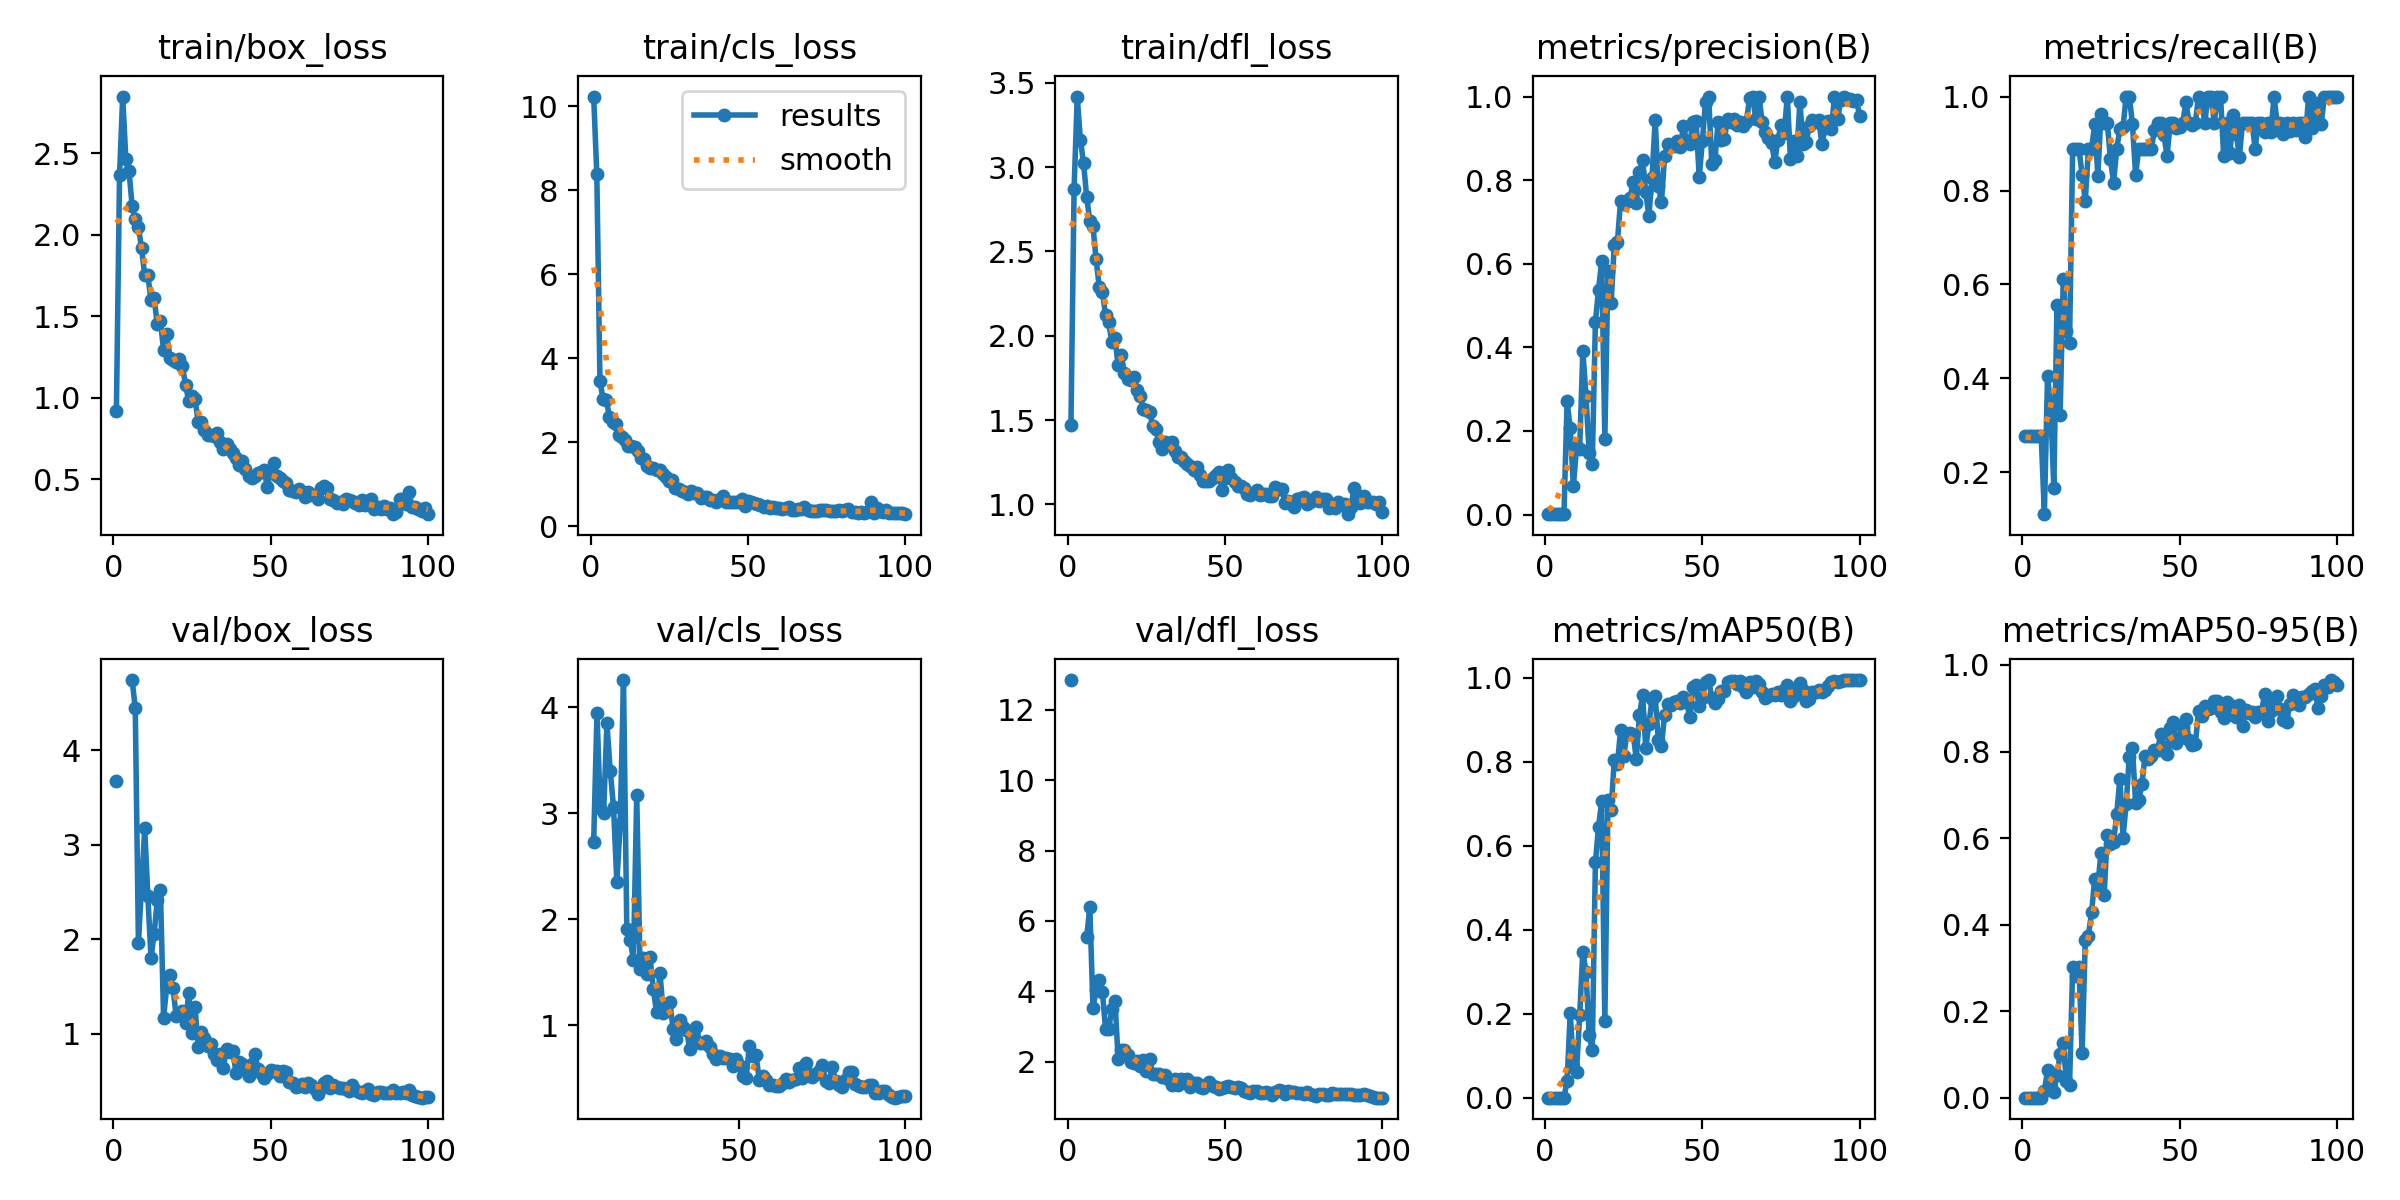

In [8]:
from IPython.display import Image
Image("runs/detect/train/results.png", width=600)

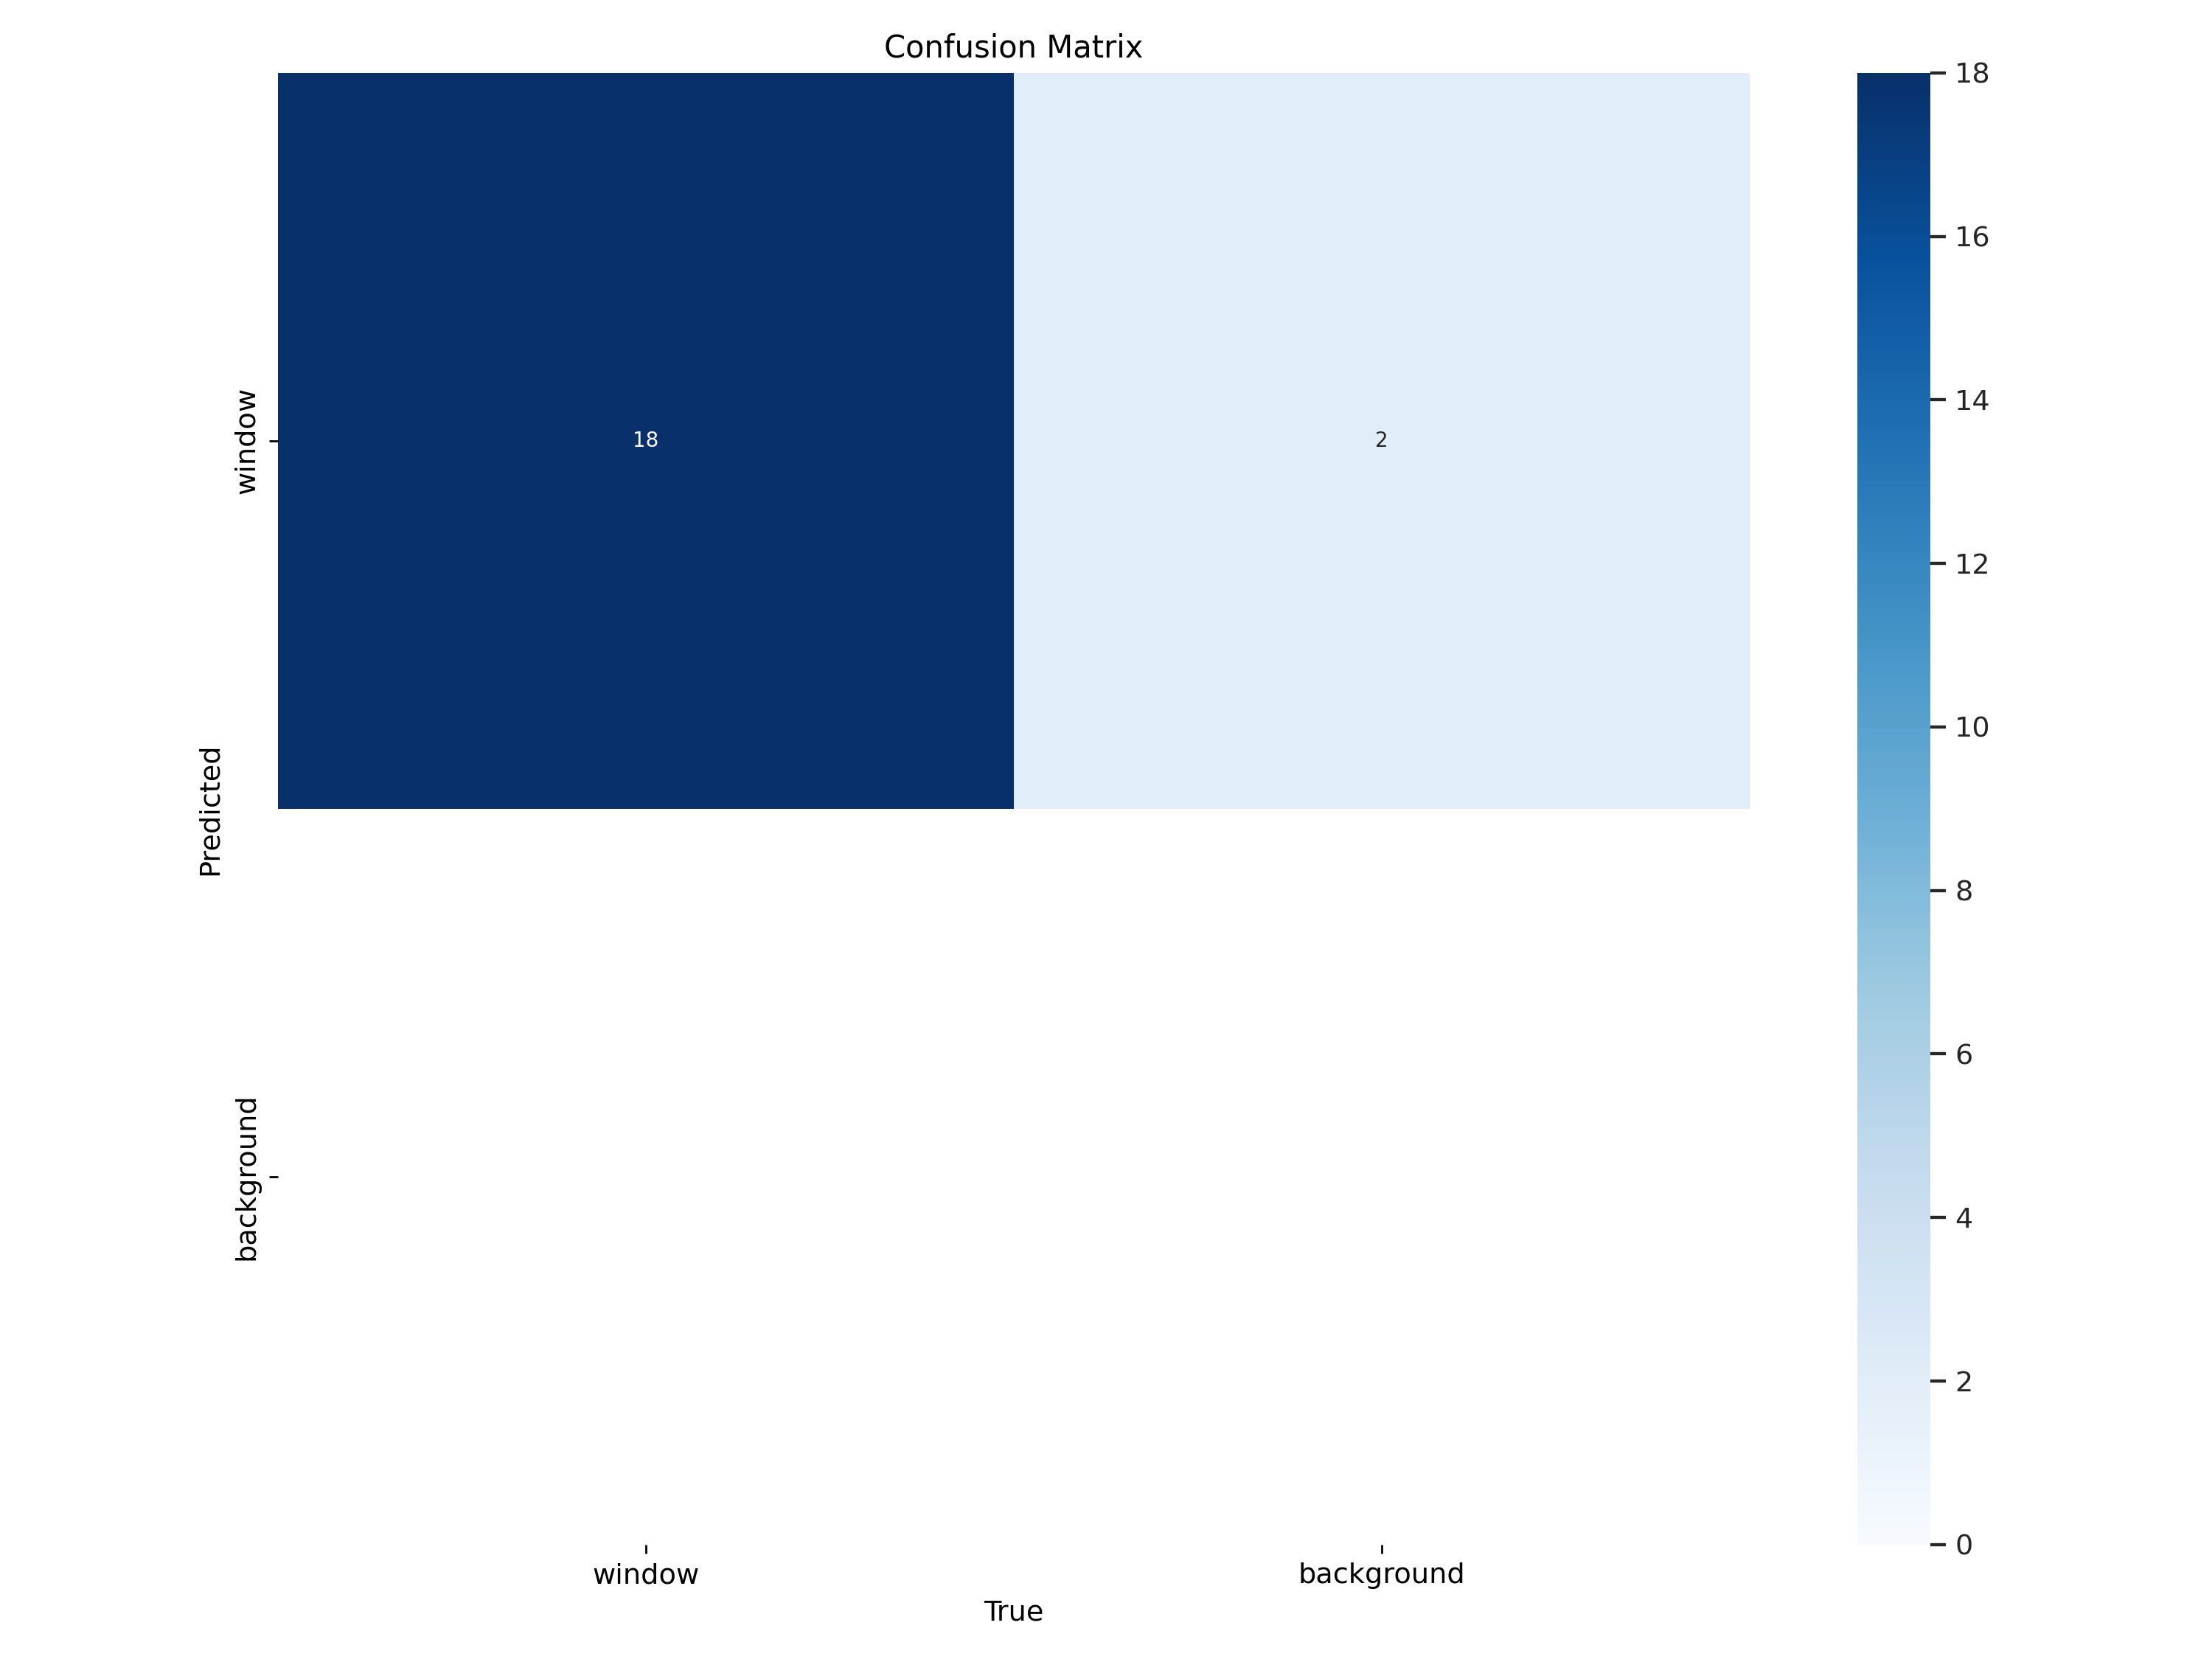

In [9]:
Image(filename=f'runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
import torch
model = torch.load("/content/datasets/WhatsappWindow-1/runs/detect/train/weights/best.pt")

ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.


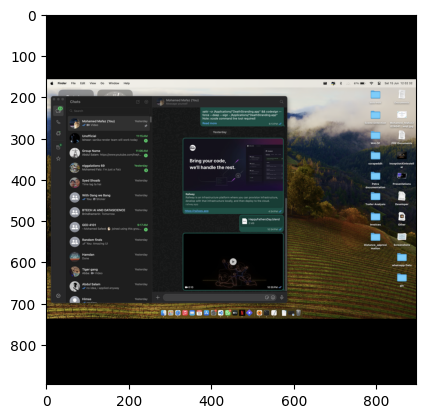

In [ ]:
from PIL import Image
import numpy as np

from PIL import Image
import numpy as np

def resize_and_center_image(image_path, target_width, target_height):
    # Open the image
    img = Image.open(image_path)

    # Check if the image has an alpha channel (RGBA)
    if img.mode == 'RGBA':
        # Convert RGBA to RGB (remove alpha channel)
        img = img.convert('RGB')

    # Resize the image while maintaining aspect ratio
    img.thumbnail((target_width, target_height), Image.ANTIALIAS)

    # Create a new black canvas of the target size
    canvas = Image.new('RGB', (target_width, target_height), (0, 0, 0))

    # Calculate the position to paste the resized image to center it
    x_offset = (target_width - img.width) // 2
    y_offset = (target_height - img.height) // 2

    # Paste the resized image onto the canvas
    canvas.paste(img, (x_offset, y_offset))

    # Convert the PIL image to a numpy array
    image_array = np.array(canvas)

    return image_array


image = resize_and_center_image('/content/Screenshot 2024-06-15 at 12.02.32 PM.png', 896, 896)
plt.imshow(image)

In [ ]:
image.shape

(960, 960, 3)

In [ ]:
32*28

896

Shape of the RGB image tensor: torch.Size([3, 896, 896])


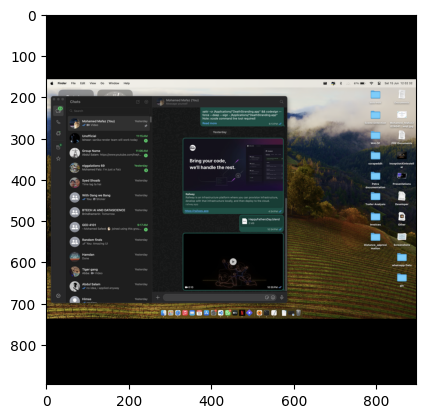

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

img_tensor = transform(image)
print(f"Shape of the RGB image tensor: {img_tensor.shape}")

plt.imshow(img_tensor.permute(1, 2, 0))
plt.show()


In [ ]:
model = YOLO("/content/datasets/WhatsappWindow-1/runs/detect/train/weights/best.pt")
result = model.predict(img_tensor.unsqueeze(0))

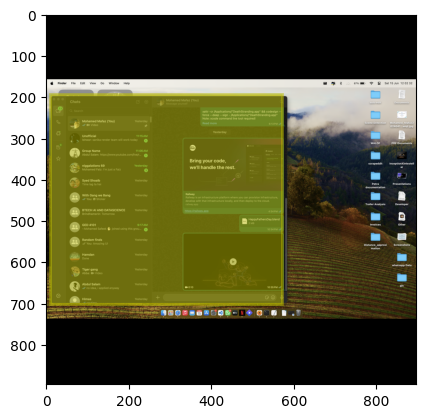

In [ ]:
import matplotlib.patches as patches

# data = plt.imread("/content/whatsappchat-1/train/images/Screenshot-2024-06-03-at-10-32-48-PM_png.rf.3c88f20d567cf3def6cec35e06275f18.jpg")
data = result[0].orig_img
# data = data.cpu().permute(1,2,0).numpy()
fig, ax = plt.subplots()
ax.imshow(data)

for idx, box in enumerate([result[0].boxes.xywh[0]]):
  x_center, y_center, width, height = box.cpu()
  xmin = x_center - width / 2
  ymin = y_center - height / 2
  xmax = x_center + width / 2
  ymax = y_center + height / 2
  rect = patches.Rectangle((xmin, ymin), width, height, linewidth=2, edgecolor="y", facecolor="y", alpha=0.5)
  ax.add_patch(rect)